In [ ]:
!nvidia-smi -L

GPU 0: Tesla P4 (UUID: GPU-f03a16b9-946d-f76f-c5f5-10fe0bae0c11)


In [ ]:
!wget kaggle datasets download -d BengaliAI/numta

DEBUG output created by Wget 1.19.4 on linux-gnu.

Reading HSTS entries from /root/.wget-hsts
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2021-05-20 04:26:46--  http://kaggle/
Resolving kaggle (kaggle)... failed: Name or service not known.
wget: unable to resolve host address ‘kaggle’
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2021-05-20 04:26:46--  http://datasets/
Resolving datasets (datasets)... failed: Name or service not known.
wget: unable to resolve host address ‘datasets’
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2021-05-20 04:26:46--  http://download/
Resolving download (download)... failed: No address associated with hostname.
wget: unable to resolve host address ‘download’
URI encoding = ‘UTF-8’
Converted file name 'numta' (UTF-8) -> 'numta' (UTF-8)
--2021-05-20 04:26:46--  http://bengaliai/numta
Resolving bengaliai (bengaliai)... faile

In [ ]:
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install pillow
!pip install scipy

In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
!pwd

/content


In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [ ]:
# from keras.preprocessing.image import flow_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
size = 192
batchSize = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/data/train',
        target_size=(size, size),
        batch_size=batchSize,
        class_mode='categorical',
        shuffle=True)
validation_generator = valid_datagen.flow_from_directory(
        '/content/data/validation',
        target_size=(size, size),
        batch_size=batchSize,
        class_mode='categorical',
        shuffle=True)

Found 14807 images belonging to 10 classes.
Found 4921 images belonging to 10 classes.


In [ ]:
pwd

'/content'

In [ ]:
!pip install scipy

In [ ]:
for image_batch,label_batch in train_generator:
    break
print(image_batch.shape, label_batch.shape)

(16, 192, 192, 3) (16, 10)


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import tensorflow_hub as hub

tf.random.set_seed(42)
model = tf.keras.Sequential([
 hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v2_100_192/feature_vector/5', 
 output_shape=[1280],
 trainable=False),
#  tf.keras.layers.Dropout(0.3),
#  tf.keras.layers.Dense(124, activation='relu'),
 tf.keras.layers.Dropout(0.3),
 tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, size, size, 3])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-2), metrics=['accuracy'])

In [ ]:
# set up early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=4)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4)

model_checkpoint_callback = ModelCheckpoint(
    filepath='test_model_192_bs16_1.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
batch_size = batchSize
Epochs = 40

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size


history = model.fit(train_generator,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=Epochs,
        validation_data=validation_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=[early_stopping, model_checkpoint_callback])



# score = model.evaluate(validation_generator[0], validation_generator[1], verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# model.save("test_model.h5")

Epoch 1/40
925/925 [==============================] - 189s 201ms/step - loss: 0.7212 - accuracy: 0.8050 - val_loss: 0.4327 - val_accuracy: 0.9070
Epoch 2/40
925/925 [==============================] - 184s 199ms/step - loss: 0.6249 - accuracy: 0.8874 - val_loss: 0.5466 - val_accuracy: 0.9070
Epoch 3/40
925/925 [==============================] - 184s 199ms/step - loss: 0.7304 - accuracy: 0.8989 - val_loss: 0.4572 - val_accuracy: 0.9300
Epoch 4/40
925/925 [==============================] - 185s 200ms/step - loss: 0.6116 - accuracy: 0.9125 - val_loss: 0.4661 - val_accuracy: 0.9389
Epoch 5/40
925/925 [==============================] - 186s 201ms/step - loss: 0.7064 - accuracy: 0.9094 - val_loss: 0.4940 - val_accuracy: 0.9422
Epoch 6/40
925/925 [==============================] - 182s 197ms/step - loss: 0.6648 - accuracy: 0.9172 - val_loss: 0.4948 - val_accuracy: 0.9399
Epoch 7/40
925/925 [==============================] - 185s 200ms/step - loss: 0.7050 - accuracy: 0.9150 - val_loss: 0.4700 -

In [ ]:
del test_datagen

In [ ]:
print(STEP_SIZE_TRAIN, STEP_SIZE_VALID)

294 9


In [ ]:
model.save("8epochs.h5")

# Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical')

Found 264 images belonging to 10 classes.


In [ ]:
test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)
print("Test batch shape:", test_image_batch.shape)

Test batch shape: (32, 180, 180, 3)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
tf_model_predictions = model.predict(test_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 10)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['4' '9' '8' '9' '3' '7' '5' '7' '1' '3' '5' '0' '5' '1' '7' '9' '1' '1'
 '9' '7' '1' '1' '6' '6' '7' '4' '3' '7' '2' '3' '6' '2']


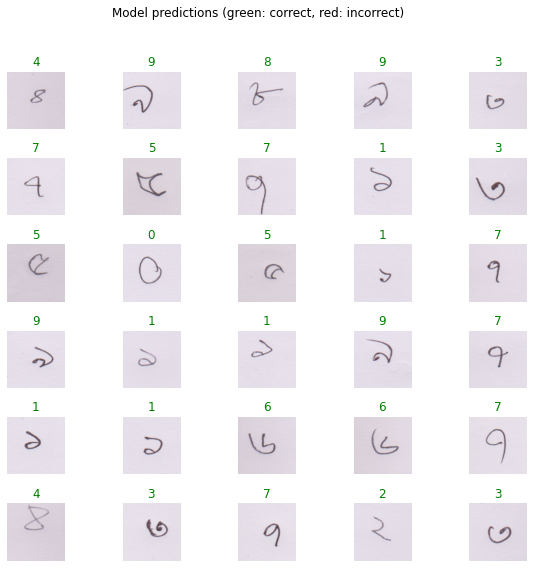

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(test_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

# Create standalone function for testing single image

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
# new_model = keras.models.load_model('8epochs.h5',custom_objects={'KerasLayer':hub.KerasLayer})
new_model = tf.keras.models.load_model('test_model.h5')

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

img_width, img_height = 180, 180
img = image.load_img('data/test/0/a00004.png', target_size = (img_width, img_height))
np_image = np.array(img).astype('float32')/255
np_image = np.expand_dims(np_image, axis=0)

np.argmax(new_model.predict(np_image))

0